In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('default') # Make the graphs a bit prettier

plt.rcParams['figure.figsize'] = (12, 4)

#  Analisis exploratorio ultimos 6 meses año 2017

El analisis exploratorio que se presenta a continuacion tiene como fin determinar que feathers influyen en mayor medida a la hora de determinar el precio de un inmueble en Capital Federal y Gran Buenos Aires, asi como tambien encontrar datos curiosos en el data set.

In [2]:
sell_properati = pd.read_csv('../data/properati-AR-2017-08-01-properties-sell-six_months.csv')

In [3]:
sell_properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 27 columns):
id                            121220 non-null object
created_on                    121220 non-null object
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 no

In [4]:
sell_properati['created_on'] = sell_properati['created_on'].apply(lambda x : pd.to_datetime(x))

In [5]:
sell_properati['year'] = sell_properati['created_on'].apply(lambda x : x.year)

In [6]:
sell_properati.year.unique()

array([2017])

In [7]:
sell_properati['year_month'] = sell_properati.created_on.apply(lambda x: str(x.year) + '-' + str(x.month))

In [8]:
sell_properati.year_month.unique()

array(['2017-2', '2017-3', '2017-4', '2017-5', '2017-6', '2017-7', '2017-8'], dtype=object)

In [9]:
sell_properati['zone'] = sell_properati.place_with_parent_names.apply(lambda x : x.split('|')[3])

Filtramos por los datos que son reelevantes para nuestro analisis, obteniendo unicamente las propiedades de GBA y capital federal

In [10]:
sell_properati = sell_properati[
    (sell_properati['state_name'] == 'Bs.As. G.B.A. Zona Norte' ) |
    (sell_properati['state_name'] == 'Bs.As. G.B.A. Zona Sur' ) |
    (sell_properati['state_name'] == 'Bs.As. G.B.A. Zona Oeste' ) |
    (sell_properati['state_name'] == 'Capital Federal' ) 
    ]

In [11]:
sell_properati.count()

id                            81150
created_on                    81150
operation                     81150
property_type                 81150
place_name                    81127
place_with_parent_names       81150
country_name                  81150
state_name                    81150
geonames_id                   63896
lat-lon                       46794
lat                           46794
lon                           46794
price                         72494
currency                      72494
price_aprox_local_currency    72494
price_aprox_usd               72494
surface_total_in_m2           58358
surface_covered_in_m2         72645
price_usd_per_m2              51635
price_per_m2                  66015
floor                          5644
rooms                         29939
expenses                      12083
properati_url                 81150
description                   81149
title                         81150
image_thumbnail               79479
year                        

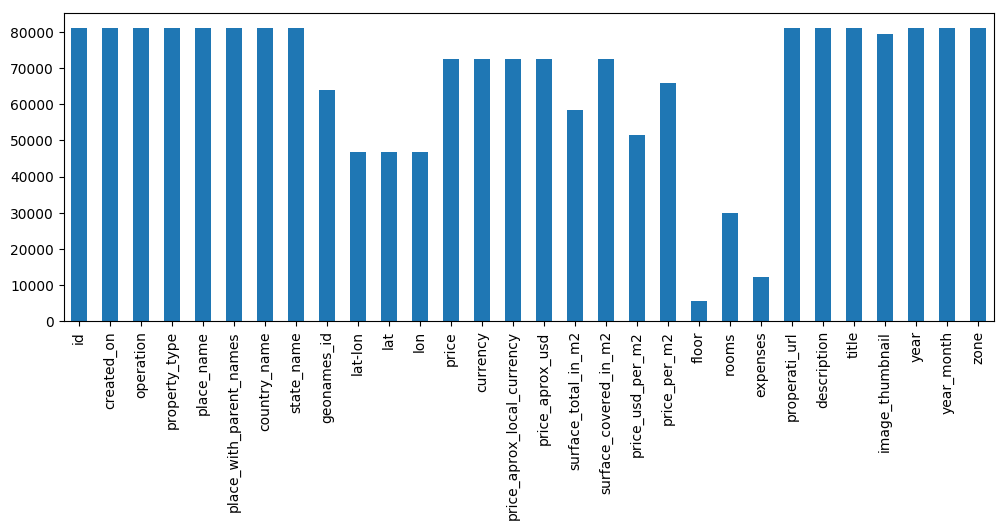

In [12]:
sell_properati.count().plot(kind='bar')

In [13]:
sell_properati[(pd.isnull(sell_properati['place_name']))].zone.unique()

array(['Tigre'], dtype=object)

#### Las propiedades del tigre son las unicas que no contienen informacion en 'place_name'

In [14]:
sell_properati.loc[pd.isnull(sell_properati['place_name']),'place_name'] = sell_properati.place_name.apply(lambda x : x if pd.notnull(x) else 'Tigre' )

In [15]:
sell_properati[(pd.isnull(sell_properati['place_name']))].zone.unique()

array([], dtype=object)

In [16]:
sell_properati.shape

(81150, 30)

In [17]:
sell_properati.groupby(by='id').count().shape

(81150, 29)

sell_properati.drop(inplace=True,labels=['id','operation','country_name','properati_url','description','image_thumbnail','title'],axis=1)

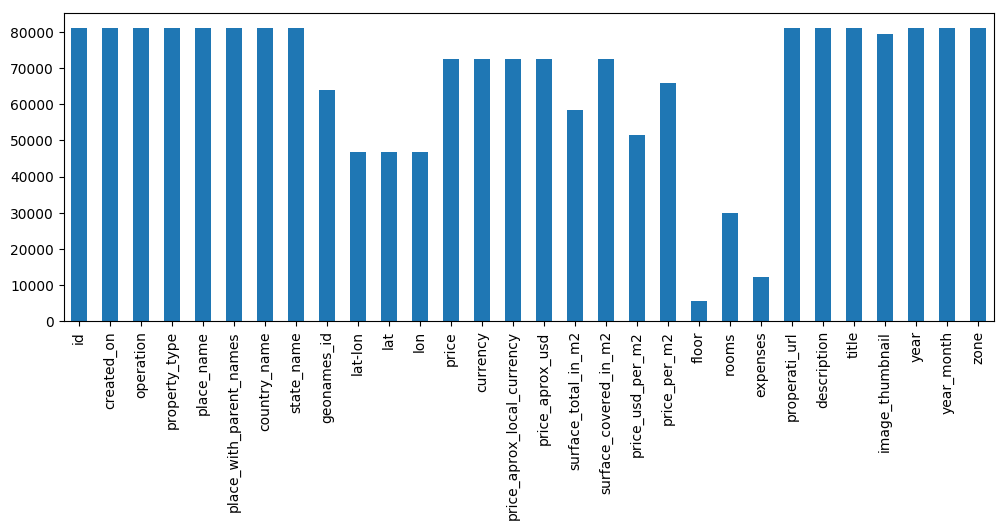

In [18]:
sell_properati.count().plot.bar()

In [19]:
sell_properati.property_type.unique()

array(['PH', 'apartment', 'house', 'store'], dtype=object)

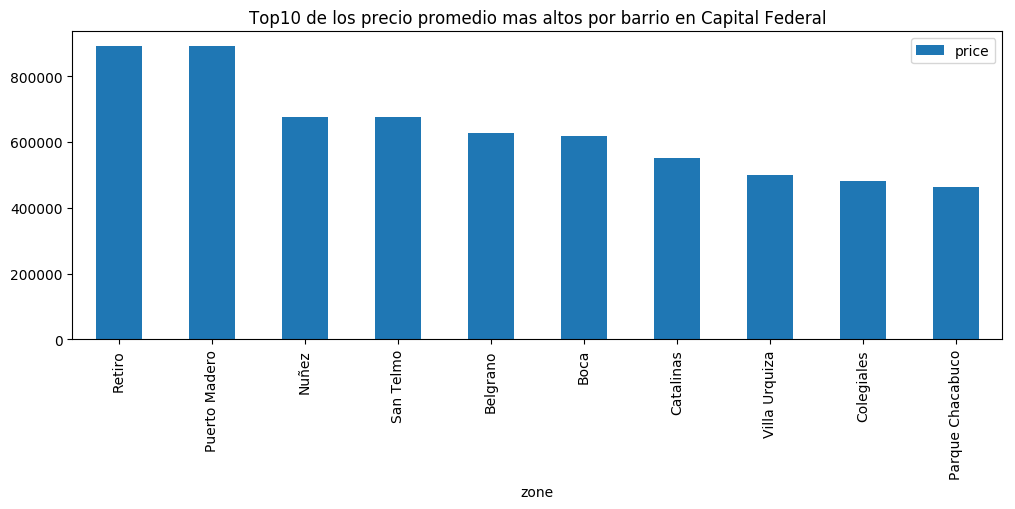

In [20]:
sell_properati[   (sell_properati['property_type'] == 'apartment') & \
                  (sell_properati['state_name'] == 'Capital Federal' )
              ].groupby(by='zone').mean()\
                .reset_index().sort_values(by='price',ascending=False).head(10)\
                .plot.bar(y='price',x='zone',title='Top10 de los precio promedio mas altos por barrio en Capital Federal')

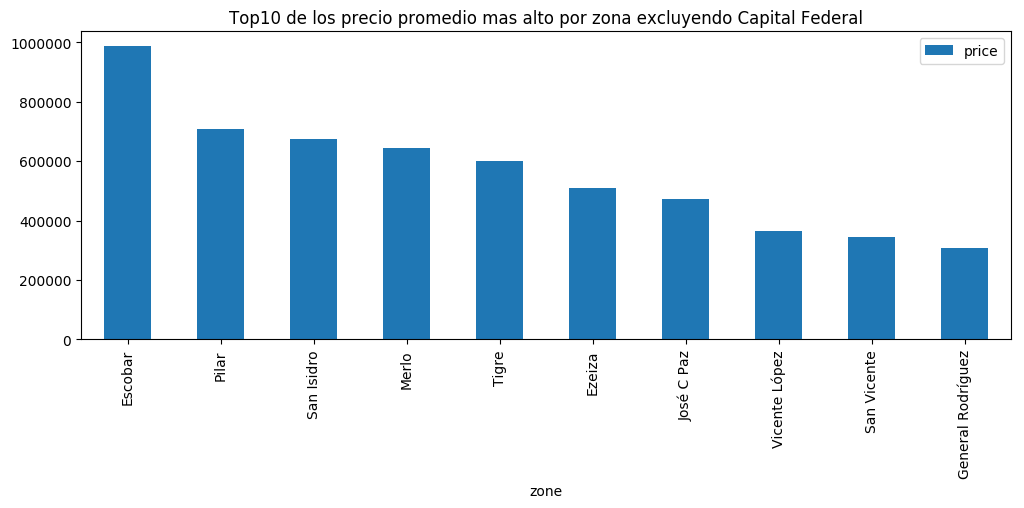

In [21]:
sell_properati[   (sell_properati['property_type'] == 'apartment') & \
                  (sell_properati['state_name'] != 'Capital Federal' )
              ].groupby(by='zone').mean()\
                .reset_index().sort_values(by='price',ascending=False).head(10)\
                .plot.bar(y='price',x='zone',title='Top10 de los precio promedio mas alto por zona excluyendo Capital Federal')

### A continuacion vamos a trabajar con los precios de las propiedades

In [22]:
price_sell_properati = sell_properati[['place_name','property_type','currency','price','price_aprox_local_currency','price_aprox_usd',\
                                       'surface_total_in_m2','surface_covered_in_m2','price_per_m2','price_usd_per_m2']]

In [23]:
price_sell_properati.shape

(81150, 10)

In [24]:
price_sell_properati.count()

place_name                    81150
property_type                 81150
currency                      72494
price                         72494
price_aprox_local_currency    72494
price_aprox_usd               72494
surface_total_in_m2           58358
surface_covered_in_m2         72645
price_per_m2                  66015
price_usd_per_m2              51635
dtype: int64

In [25]:
price_sell_properati[pd.isnull(price_sell_properati['currency'])].sample(5)

,place_name,property_type,currency,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_per_m2,price_usd_per_m2
3638,Los Pingüinos Country Club,house,NaN,NaN,NaN,NaN,100.0,90.0,NaN,NaN
40724,Quilmes,house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2619,Esteban Echeverría,house,NaN,NaN,NaN,NaN,160.0,160.0,NaN,NaN
2959,Moreno,house,NaN,NaN,NaN,NaN,810.0,192.0,NaN,NaN
4163,Ituzaingó,house,NaN,NaN,NaN,NaN,372.0,280.0,NaN,NaN


In [26]:
price_sell_properati[pd.isnull(price_sell_properati['currency'])].count()

place_name                    8656
property_type                 8656
currency                         0
price                            0
price_aprox_local_currency       0
price_aprox_usd                  0
surface_total_in_m2           6561
surface_covered_in_m2         6628
price_per_m2                     0
price_usd_per_m2                 0
dtype: int64

Debemos excluir los datos que tienen no tienen datos sobre 'currency' ya que no nos brindan ninguna informacion y ademas afecta el resultado real puesto que no tienen datos sobre el precio y la superficie por lo cual no se pueden sacar muchas conclusiones de esto.

In [27]:
price_sell_properati = price_sell_properati[pd.notnull(price_sell_properati['currency'])]

In [28]:
price_sell_properati[pd.isnull(price_sell_properati['price']) ].shape[0]

0

In [29]:
price_sell_properati[pd.isnull(price_sell_properati['price_aprox_local_currency']) ].shape[0]

0

In [30]:
price_sell_properati[pd.isnull(price_sell_properati['price_aprox_usd']) ].shape[0]

0

In [31]:
price_sell_properati[pd.isnull(price_sell_properati['surface_total_in_m2']) ].shape[0]

20697

In [32]:
price_sell_properati[pd.isnull(price_sell_properati['surface_covered_in_m2']) ].shape[0]

6477

In [33]:
price_sell_properati[pd.isnull(price_sell_properati['price_per_m2']) ].shape[0]

6479

In [34]:
price_sell_properati[pd.isnull(price_sell_properati['price_usd_per_m2']) ].shape[0]

20859

In [35]:
price_sell_properati[pd.isnull(price_sell_properati['price_per_m2']) ].groupby(by='currency').count()

,place_name,property_type,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_per_m2,price_usd_per_m2
currency,,,,,,,,,
ARS,222,222,222,222,222,81,0,0,49
PEN,2,2,2,2,2,0,0,0,0
USD,6255,6255,6255,6255,6255,2749,2,0,2619


In [36]:
price_sell_properati.groupby(by='currency').count()

,place_name,property_type,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_per_m2,price_usd_per_m2
currency,,,,,,,,,
ARS,2932,2932,2932,2932,2932,2339,2710,2710,2307
PEN,2,2,2,2,2,0,0,0,0
USD,69560,69560,69560,69560,69560,49458,63307,63305,49328


 Queremos estudiar el precio en dolares de los inmuebles por lo cual la informacion que mas nos interesa es **price, price_aprox_usd, price_per_m2, surface_total_in_m2 y price_usd_por_m2 **, teniendo en cuenta estas 5 columna se podria completar gran parte de los datos para tener la mayor presicion posible al realizar el analisis exploratorio. 

Se van a estimar los datos de los precios publicados en [PEN](https://es.wikipedia.org/w/index.php?title=Nuevo_sol) ya que no aportan informacion sobre los metros cuadrados de las propiedades

In [37]:
price_sell_properati.count()

place_name                    72494
property_type                 72494
currency                      72494
price                         72494
price_aprox_local_currency    72494
price_aprox_usd               72494
surface_total_in_m2           51797
surface_covered_in_m2         66017
price_per_m2                  66015
price_usd_per_m2              51635
dtype: int64

### Calculamos la superficie total en metros cuadrados de las propiedades que no cuentan con este dato

In [39]:
price_sell_properati.loc[
                        (pd.isnull(price_sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(price_sell_properati['price']) ) & \
                        (pd.notnull(price_sell_properati['price_per_m2'])) ,'surface_total_in_m2'] = \
    price_sell_properati.loc[
                        (pd.isnull(price_sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(price_sell_properati['price']) ) & \
                        (pd.notnull(price_sell_properati['price_per_m2']))].price / \
    price_sell_properati.loc[
                        (pd.isnull(price_sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(price_sell_properati['price']) ) & \
                        (pd.notnull(price_sell_properati['price_per_m2']))].price_per_m2

### Calculamos el precio por metro cuadrado en USD de los inmuebles que no cuentan con dicha informacion

In [40]:
price_sell_properati.loc[
                        (pd.isnull(price_sell_properati['price_usd_per_m2']) ) & \
                        (pd.notnull(price_sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(price_sell_properati['price_aprox_usd'])) ,'price_usd_per_m2'] = \
    price_sell_properati.loc[                        
                        (pd.isnull(price_sell_properati['price_usd_per_m2']) ) & \
                        (pd.notnull(price_sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(price_sell_properati['price_aprox_usd']))].price_aprox_usd / \
    price_sell_properati.loc[                        
                        (pd.isnull(price_sell_properati['price_usd_per_m2']) ) & \
                        (pd.notnull(price_sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(price_sell_properati['price_aprox_usd'])) ].surface_total_in_m2

### Se agrega el precio por metro cuadrado en la moneda actual en cada unos de las pripiedades

In [41]:
price_sell_properati.loc[
                        (pd.isnull(price_sell_properati['price_per_m2']) ) & \
                        (pd.notnull(price_sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(price_sell_properati['price'])) ,'price_per_m2'] = \
    price_sell_properati.loc[ 
                        (pd.isnull(price_sell_properati['price_per_m2']) ) & \
                        (pd.notnull(price_sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(price_sell_properati['price'])) ].price / \
    price_sell_properati.loc[
                        (pd.isnull(price_sell_properati['price_per_m2']) ) & \
                        (pd.notnull(price_sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(price_sell_properati['price'])) ].surface_total_in_m2

In [ ]:
price_sell_properati.count()

Ahora contamos con la informacion mucho mas completa para poder realizar un analisis exploratorio mas preciso

### ¿Que tipo de propiedades son las que no tienen informacion sobre los metros cuadrados cubiertos?

In [ ]:
price_sell_properati[pd.isnull(price_sell_properati['surface_covered_in_m2'])].groupby(by='property_type').count()

###### Hay todo tipo de propiedades que no cuentan con la informacion de los metros cuadrados cubiertos, por lo cual no podemos sacar ninguna informacion reelevante. 

In [ ]:
ax = plt.subplot(111)
ax.set_xlim(0,1000)
ax.set_ylim(0,60000)
price_sell_properati[price_sell_properati['place_name'] == 'Escobar'].plot.scatter(x='surface_covered_in_m2',y='price_usd_per_m2',ax=ax)


In [ ]:
sell_properati

In [42]:
sell_properati.loc[
                        (pd.isnull(sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(sell_properati['price']) ) & \
                        (pd.notnull(sell_properati['price_per_m2'])) ,'surface_total_in_m2'] = \
    sell_properati.loc[
                        (pd.isnull(sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(sell_properati['price']) ) & \
                        (pd.notnull(sell_properati['price_per_m2']))].price / \
    sell_properati.loc[
                        (pd.isnull(sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(sell_properati['price']) ) & \
                        (pd.notnull(sell_properati['price_per_m2']))].price_per_m2

In [43]:
sell_properati.loc[
                        (pd.isnull(sell_properati['price_usd_per_m2']) ) & \
                        (pd.notnull(sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(sell_properati['price_aprox_usd'])) ,'price_usd_per_m2'] = \
    sell_properati.loc[                        
                        (pd.isnull(sell_properati['price_usd_per_m2']) ) & \
                        (pd.notnull(sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(sell_properati['price_aprox_usd']))].price_aprox_usd / \
    sell_properati.loc[                        
                        (pd.isnull(sell_properati['price_usd_per_m2']) ) & \
                        (pd.notnull(sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(sell_properati['price_aprox_usd'])) ].surface_total_in_m2

In [44]:
sell_properati.loc[
                        (pd.isnull(sell_properati['price_per_m2']) ) & \
                        (pd.notnull(sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(sell_properati['price'])) ,'price_per_m2'] = \
    sell_properati.loc[ 
                        (pd.isnull(sell_properati['price_per_m2']) ) & \
                        (pd.notnull(sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(sell_properati['price'])) ].price / \
    sell_properati.loc[
                        (pd.isnull(sell_properati['price_per_m2']) ) & \
                        (pd.notnull(sell_properati['surface_total_in_m2']) ) & \
                        (pd.notnull(sell_properati['price'])) ].surface_total_in_m2

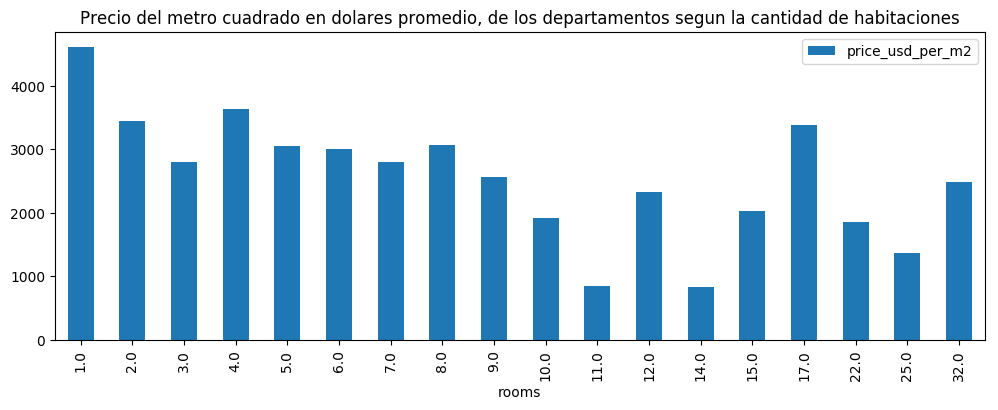

In [68]:
sell_properati[sell_properati['property_type'] == 'apartment'].groupby(by='rooms').mean().reset_index()\
.plot.bar(x='rooms',y='price_usd_per_m2',title='Precio del metro cuadrado en dolares promedio, de los departamentos segun la cantidad de habitaciones')

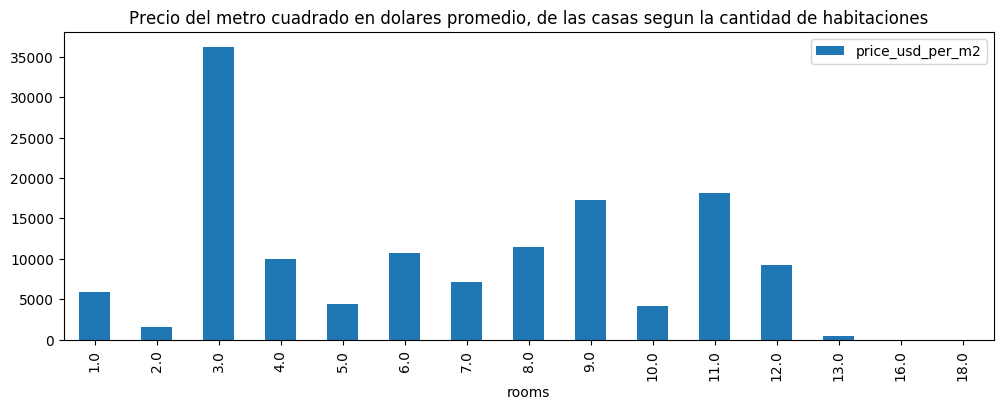

In [72]:
sell_properati[sell_properati['property_type'] == 'house'].groupby(by='rooms').std().reset_index()\
.plot.bar(x='rooms',y='price_usd_per_m2',title='Precio del metro cuadrado en dolares promedio, de las casas segun la cantidad de habitaciones')

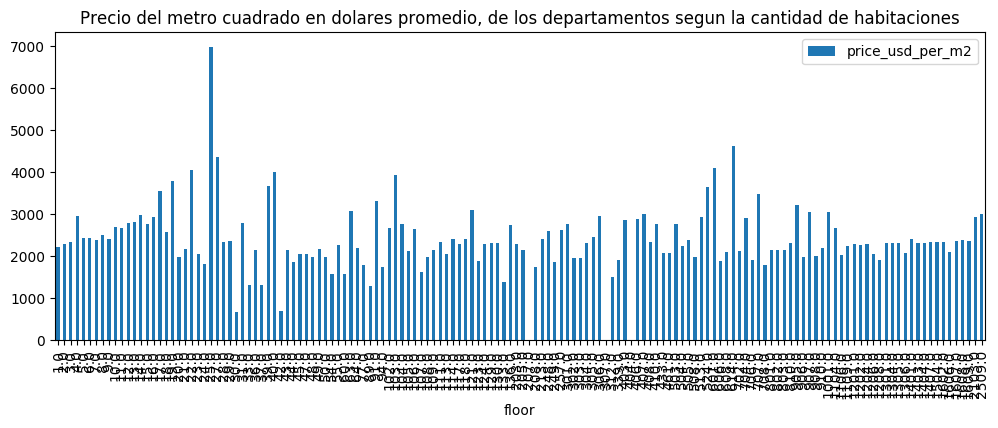

In [74]:
sell_properati[sell_properati['property_type'] == 'apartment'].groupby(by='floor').mean().reset_index()\
.plot.bar(x='floor',y='price_usd_per_m2',title='Precio del metro cuadrado en dolares promedio, de los departamentos segun la cantidad de habitaciones')

In [75]:
sell_properati[sell_properati['property_type'] == 'apartment'].floor.describe()

count    5316.000000
mean       20.423439
std       127.635067
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max      2509.000000
Name: floor, dtype: float64

In [77]:
sell_properati[sell_properati['property_type'] == 'apartment'].floor.unique().astype(int)

array([-9223372036854775808,                    2,                    1,
                         12,                    6,                    3,
                          4,                    7,                    8,
                          9,                   10,                    5,
                         11,                   13,                   14,
                         15,                   40,                   25,
                         18,                   27,                  408,
                         20,                   42,                   17,
                         30,                  111,                 1606,
                        906,                 1304,                  606,
                        907,                 1201,                 1104,
                        803,                 1202,                  303,
                        704,                 1109,                  304,
                       1206,                 1602, 